# ML Algorithm Insight Series
## Module: Support Vector Machines

### 1. Introduction & Intuition

Support Vector Machines (SVMs) are designed to find the optimal boundary that separates data into classes. Think of it as placing a rigid wall between two groups while maximizing the distance between the closest points of each group and the wall.

SVMs are particularly effective in high-dimensional spaces and in cases where the margin between classes is clear and well-defined.


### 2. How the Algorithm Works

SVMs construct a hyperplane or set of hyperplanes in a high-dimensional space. These hyperplanes act as decision boundaries.

The goal is to maximize the margin — the distance between the hyperplane and the nearest data points from each class, known as support vectors.

The optimization problem for a linear SVM can be framed as:

\[
\min_\mathbf{w}, b \quad \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to} \quad y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1
\]

For non-linear data, the kernel trick transforms the data into a higher-dimensional space where a linear separator can be found.


### 3. Data and Preparation Insights

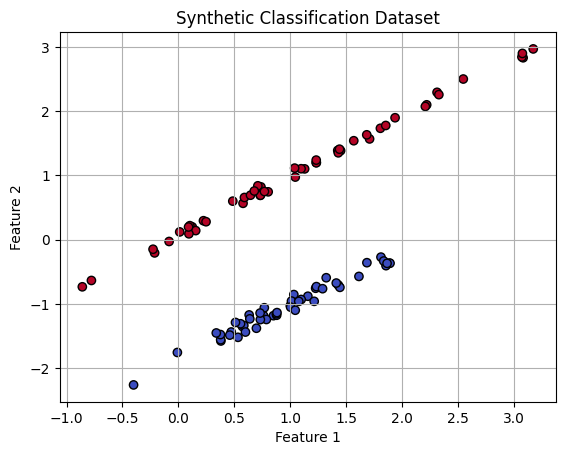

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Ensure data is scaled appropriately, especially for kernel SVMs. Standard scaling is essential for optimal margin computation.

### 4. Implementation Highlights

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

### 5. Insightful Visualization

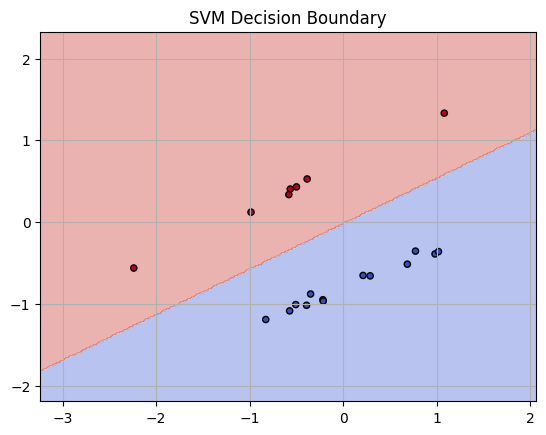

In [3]:
import numpy as np

def plot_decision_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary")
    plt.grid(True)
    plt.show()

plot_decision_boundary(svc, X_test_scaled, y_test)

Decision boundaries give visual intuition into model separation power.

### 6. Algorithm Evaluation

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### 7. Pros, Cons, and Techniques

**Strengths:**
- Effective in high dimensions
- Memory efficient (uses support vectors only)
- Flexible with kernels

**Limitations:**
- Poor performance on large datasets
- Not suitable for noisy data
- Choice of kernel and parameters critical

**Enhancements:**
- Use GridSearchCV for parameter tuning
- Try different kernels (RBF, polynomial)
- Apply dimensionality reduction before SVM


### 8. Further Explorations

- TODO: Experiment with non-linear kernels (e.g., RBF, poly)
- TODO: Visualize support vectors and their influence
- TODO: Compare with Logistic Regression on same dataset


### 9. Summary & Resources

**Key Insights:**
- SVMs are margin-based classifiers suited for clean, high-dimensional data.
- Decision boundaries and support vectors provide interpretability.
- Kernel tricks allow flexibility beyond linear separability.

**Further Reading:**
- “Pattern Recognition and Machine Learning” – Bishop
- Scikit-learn Documentation: SVMs
- Cortes & Vapnik (1995) - Support Vector Networks

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
